In [15]:
import pandas as pd

# Load data
cardio_df = pd.read_excel("SleepStagingCardioRespiratoryFeatures.xlsx", sheet_name=None)
statistical_df = pd.read_excel("SleepStagingStatisticalFeatures.xlsx", sheet_name=None)
arterial_df = pd.read_excel("SleepStagingArterialFeatures.xlsx", sheet_name=None)

# Concatenate all DataFrames from each sheet into a single DataFrame
cardio_df = pd.concat(cardio_df.values(), ignore_index=True)
statistical_df = pd.concat(statistical_df.values(), ignore_index=True)
arterial_df = pd.concat(arterial_df.values(), ignore_index=True)


In [16]:
print(cardio_df)

      SubNo  SegNo  MeanAbsDev  MedianAbsDev  InterquartileRange  \
0         1      1    0.912767      0.001655            2.192423   
1         1      2    0.756760      0.558465            1.127156   
2         1      3    0.759760      0.556348            1.112695   
3         1      4    0.761878      0.570325            1.133696   
4         1      5    0.905395      0.003289            2.193957   
...     ...    ...         ...           ...                 ...   
9423     10    811    0.862071      0.838712            1.695649   
9424     10    812    0.856795      0.815565            1.639042   
9425     10    813    0.850276      0.810235            1.626921   
9426     10    814    0.860207      0.851032            1.700608   
9427     10    815    0.861219      0.831413            1.689148   

      centralMoment  averageCurveLength  averageEnergy  averageTeagerEnergy  \
0         22.657364       -6.406334e-16            1.0              0.99987   
1       1432.670278      

In [12]:
# # Check for missing values
# cardio_df.isnull().sum()
# statistical_df.isnull().sum()
# arterial_df.isnull().sum()

print("Cardio Data Missing Values:\n", cardio_df.isnull().sum())
print("Statistical Data Missing Values:\n", statistical_df.isnull().sum())
print("Arterial Data Missing Values:\n", arterial_df.isnull().sum())

#since no missing value is present in dataset, we don't need to handle the missing value

Cardio Data Missing Values:
 SubNo                  0
SegNo                  0
MeanAbsDev             0
MedianAbsDev           0
InterquartileRange     0
centralMoment          0
averageCurveLength     0
averageEnergy          0
averageTeagerEnergy    0
shapeFactor            0
meanValue              0
sdValue                0
rmsValue               0
tmean25                0
tmean50                0
geometricMean          0
harmonicMean           0
maxValue               0
minValue               0
svdPPI                 0
skewPPI                0
kurtPPI                0
PoincareSD1            0
PoincareSD2            0
ratioSD1SD2            0
CCM                    0
HjorthActivity         0
HjorthMobility         0
HjorthComplexity       0
lam                    0
HFD                    0
KFD                    0
Class                  0
dtype: int64
Statistical Data Missing Values:
 SubNo                  0
SegNo                  0
MeanAbsDev             0
MedianAbsDev           0

In [17]:

merged_df = pd.merge(cardio_df, statistical_df, on=['SubNo', 'SegNo'])
merged_df = pd.merge(merged_df, arterial_df, on=['SubNo', 'SegNo'])


In [29]:
# Feature Extraction 
# Correlation>> model input variable-reading output class hoga like N1 , REM,,,,etc

import numpy as np
from scipy.stats import pointbiserialr

# Compute correlation between each input feature and the target variable (Class)
correlations = {}
target_variable = 'Class'

# Iterate over each input feature column
for column in merged_df.columns:
    if column != target_variable:  # Exclude the target variable
        # Compute point-biserial correlation
         # Check if the input feature has nearly constant values
        if merged_df[column].std() > 1e-5:  # Adjust the threshold as needed
            correlation, _ = pointbiserialr(merged_df[column], merged_df[target_variable])
        # Store absolute correlation value
            correlations[column] = abs(correlation)

# Sort features based on their correlation values in descending order
sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)

# Select features with positive correlation (ignoring negative correlation)
selected_features = [feature for feature, correlation in sorted_correlations if correlation > 0]

# Filter the input data with selected features
X = merged_df[selected_features]
y = merged_df[target_variable]

# Now X contains the selected features, and y contains the target variable (Class)





<IPython.core.display.Javascript object>


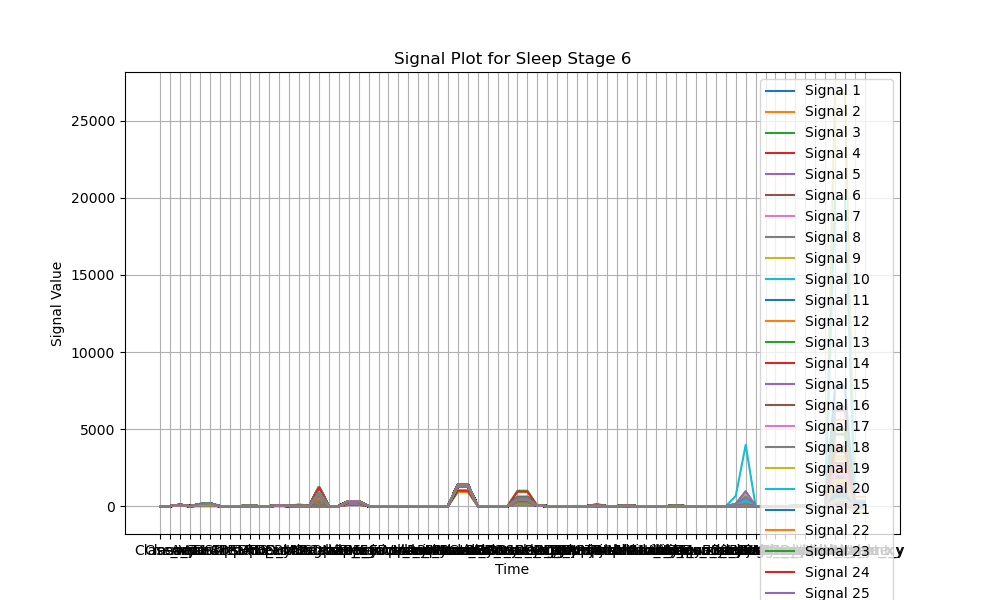

<IPython.core.display.Javascript object>


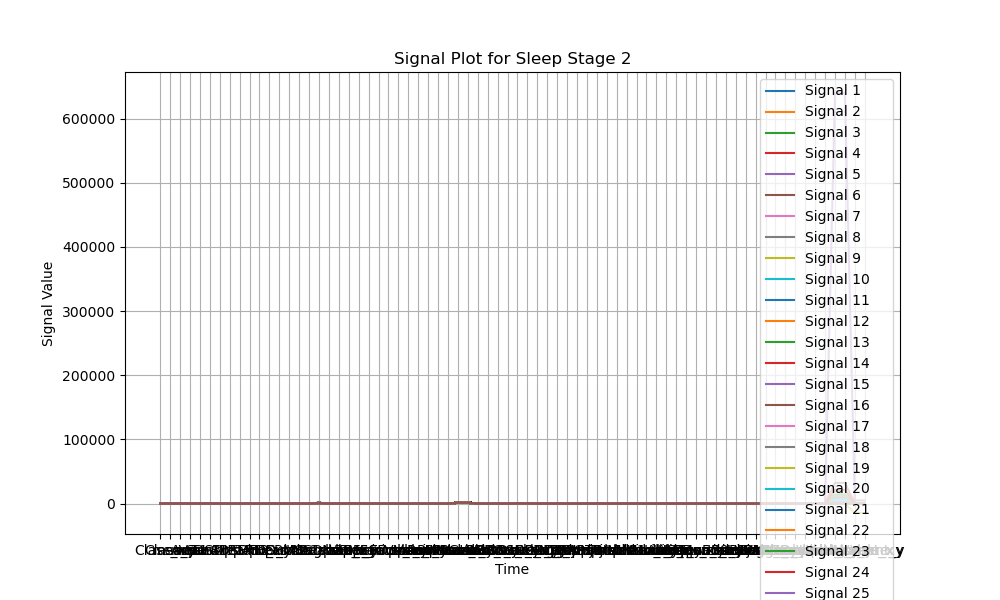

<IPython.core.display.Javascript object>


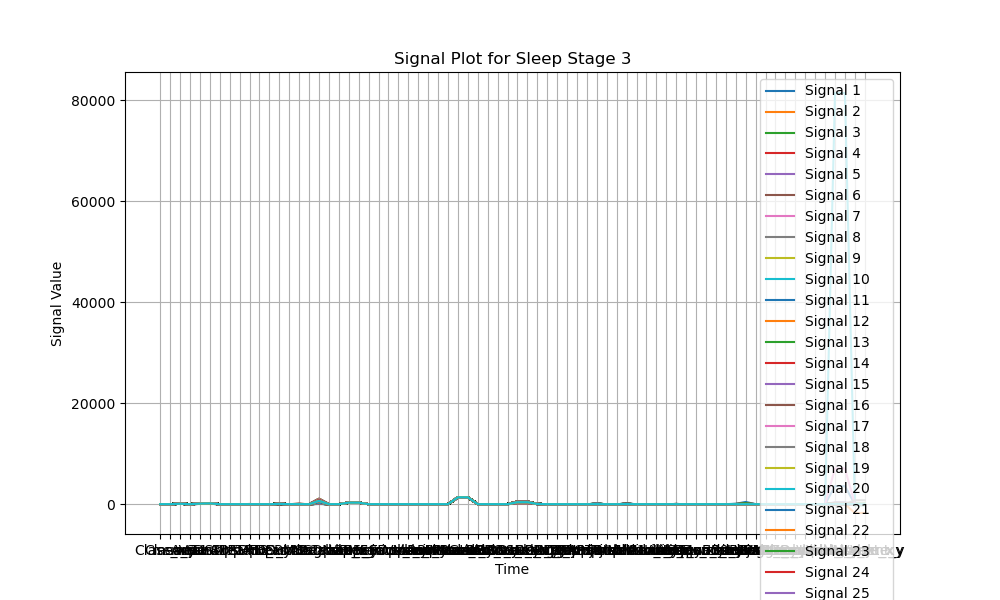

<IPython.core.display.Javascript object>


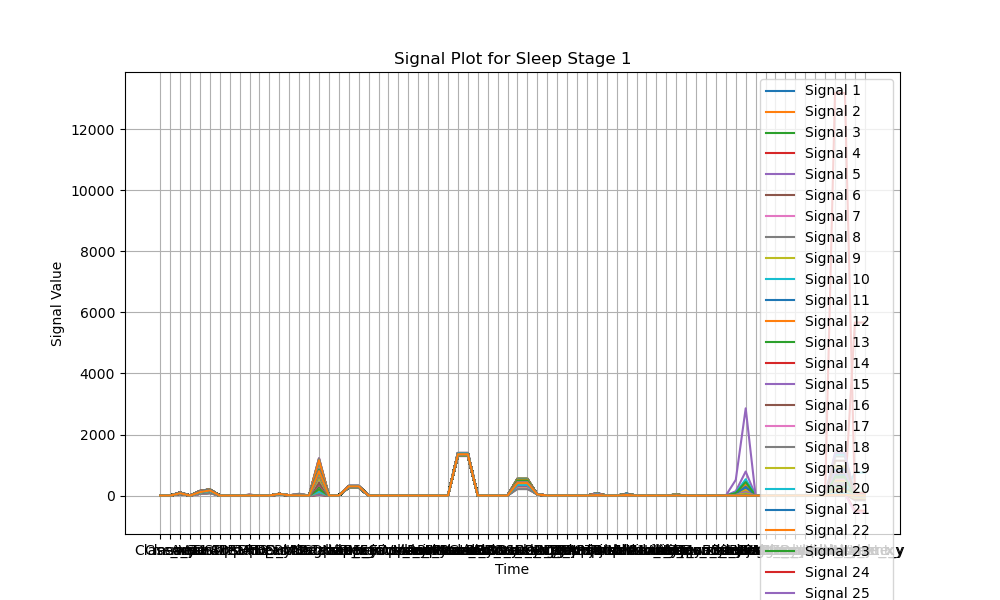

<IPython.core.display.Javascript object>


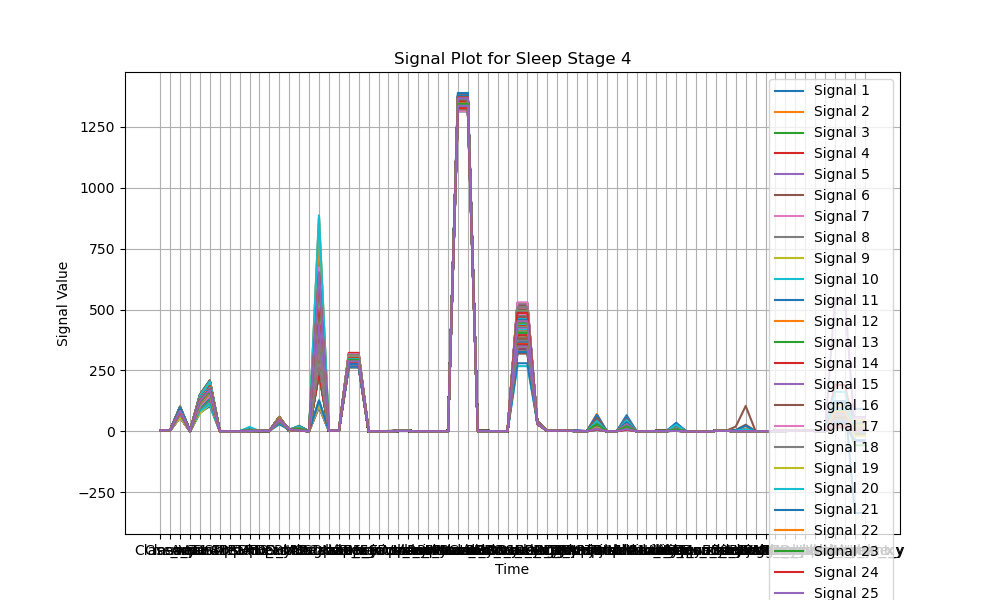

<IPython.core.display.Javascript object>


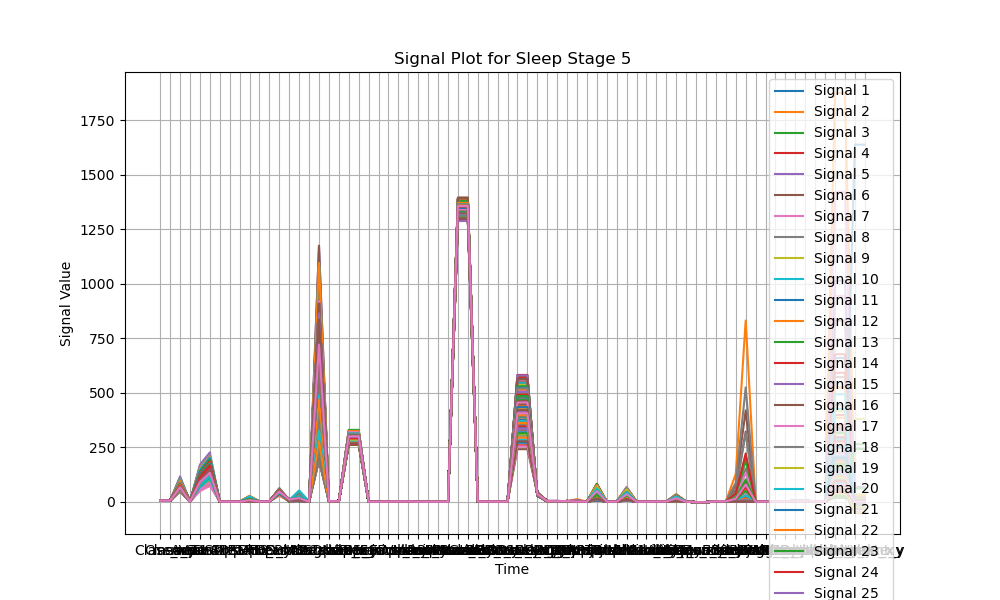

In [34]:
# PLOT OF signals for each sleep stage (e.g., N1, N2, N3, REM):
%matplotlib notebook
import matplotlib.pyplot as plt

# Assuming X contains the signals and y contains the corresponding sleep stages

# Get unique sleep stages
sleep_stages = y.unique()

# Plot signals for each sleep stage
for stage in sleep_stages:
    # Filter data for the current sleep stage
    stage_data = X[y == stage]
    
    # Plot the signals
    plt.figure(figsize=(10, 6))
    plt.title(f'Signal Plot for Sleep Stage {stage}')
    plt.xlabel('Time')
    plt.ylabel('Signal Value')
#     time_axis = range(stage_data.shape[1])  # Assuming each row represents a signal sample
#     time_axis_seconds = [t / sampling_frequency for t in time_axis]
    
    # Plot each signal in the current sleep stage
    for i in range(stage_data.shape[0]):
        plt.plot(stage_data.iloc[i], label=f'Signal {i+1}')
    
    plt.legend()
    plt.grid(True)
    plt.show()





In [ ]:
# Vision tranfom
